In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
time = np.linspace(0, 1, 365*2)
result = np.sin(2*np.pi*12*time)
ds = pd.date_range('2017-01-01', periods=365*2, freq='D')
df = pd.DataFrame({'ds': ds, 'y':result})
df.head()

,ds,y
0,2017-01-01,0.000000
1,2017-01-02,0.103243
2,2017-01-03,0.205382
3,2017-01-04,0.305326
4,2017-01-05,0.402007


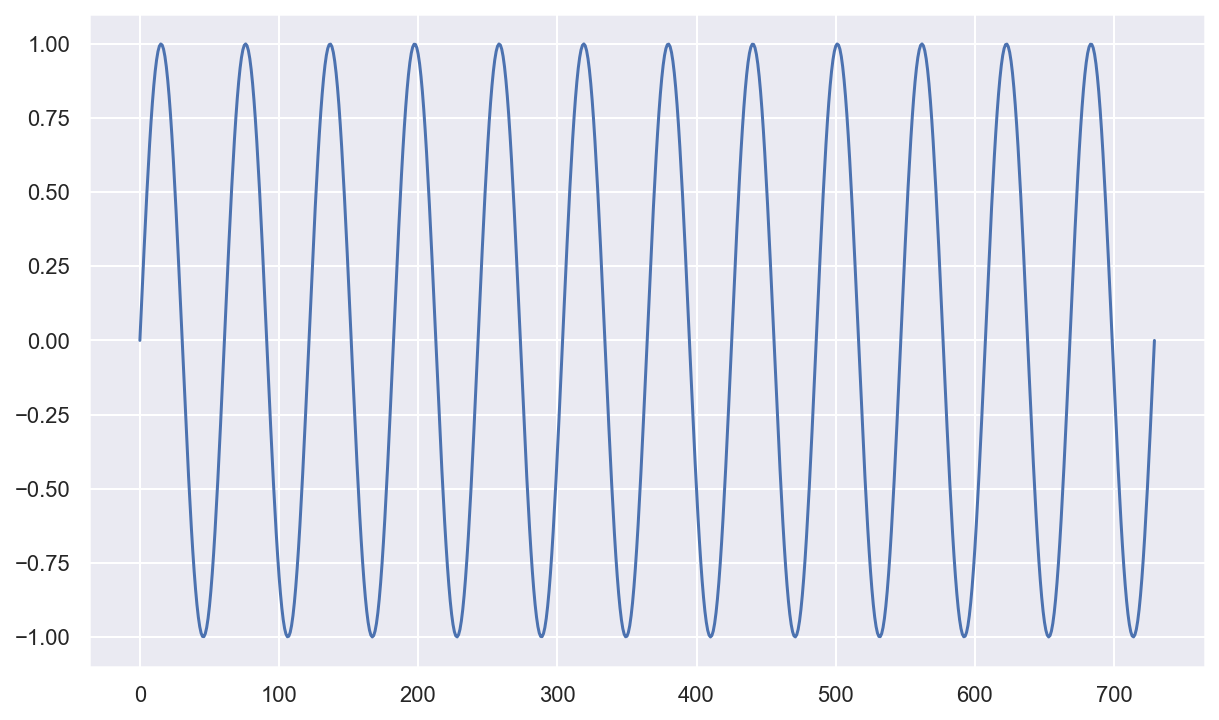

In [5]:
df['y'].plot(figsize=(10,6));

In [6]:
from fbprophet import Prophet

m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df)

INFO:numexpr.utils:Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [7]:
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)

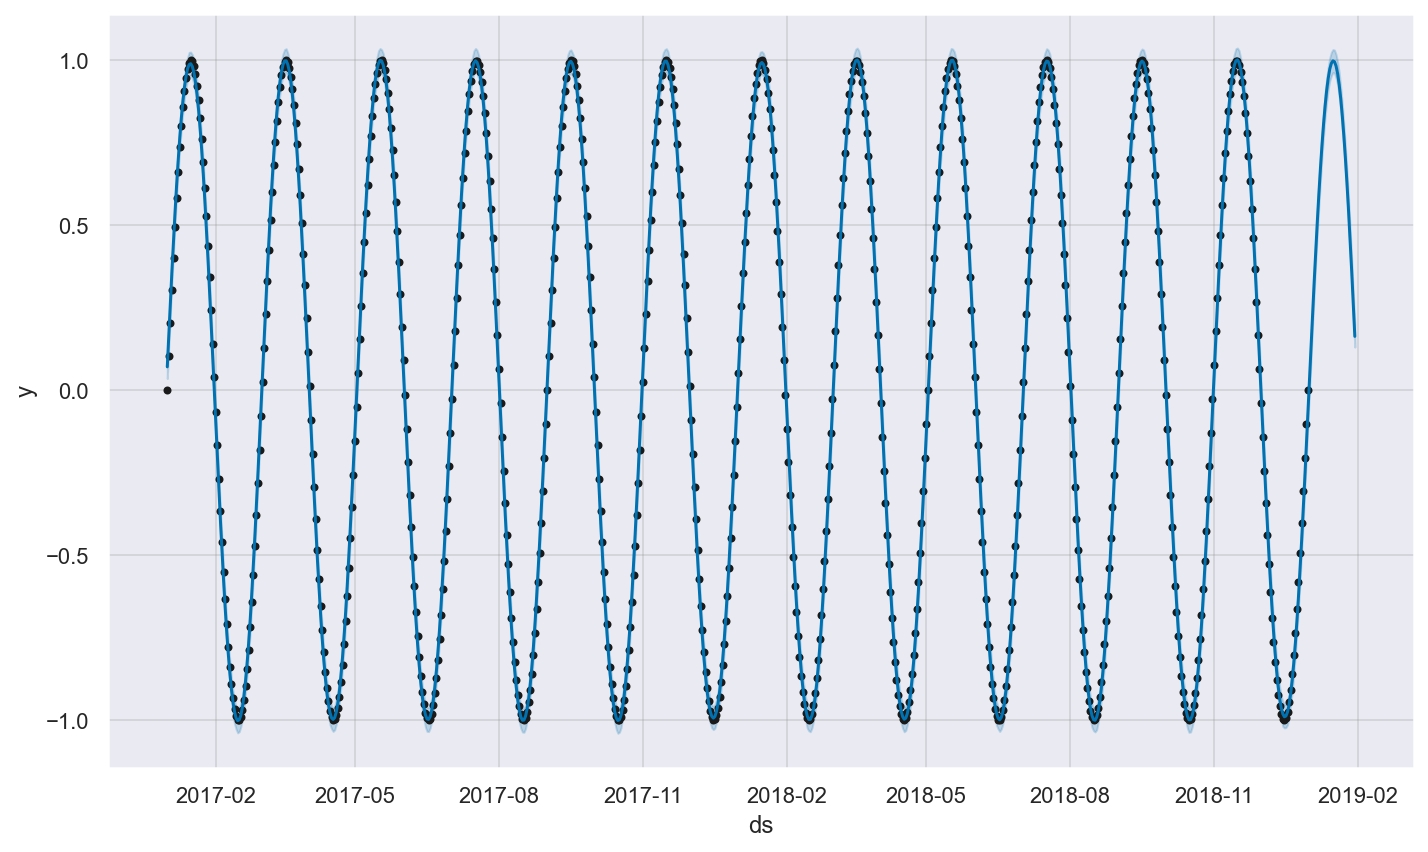

In [8]:
m.plot(forecast);

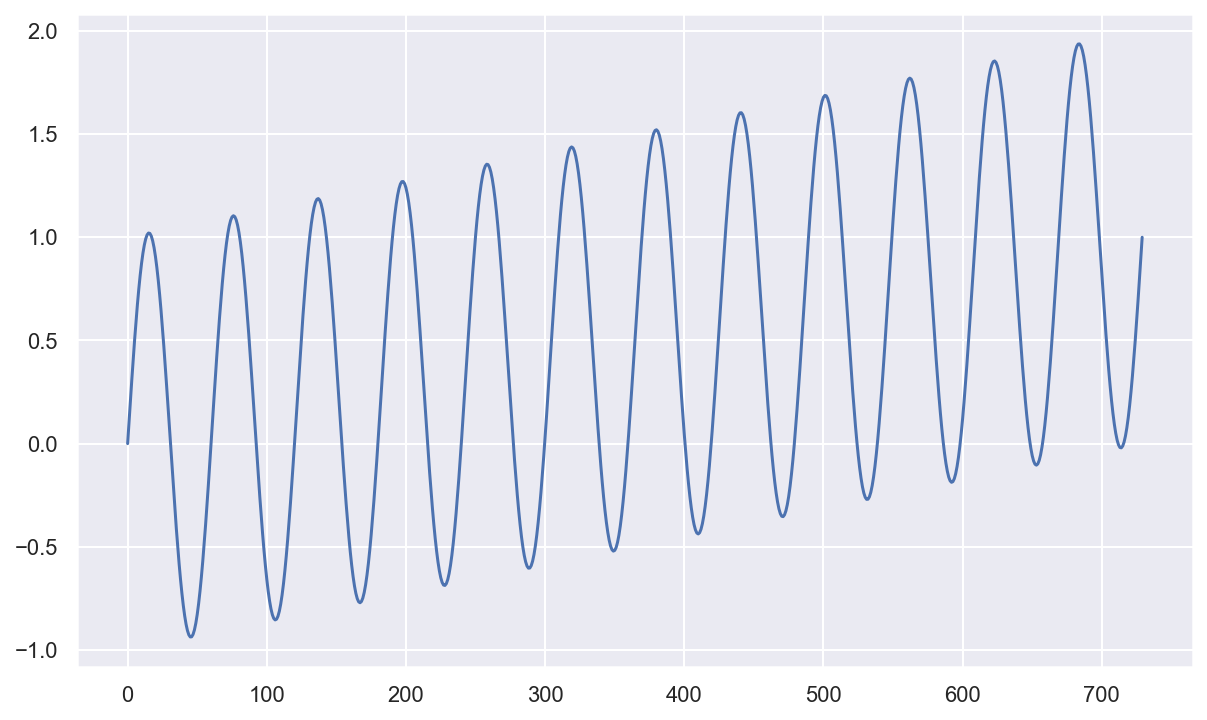

In [10]:
time = np.linspace(0, 1, 365*2)
result = np.sin(2*np.pi*12*time) + time

ds = pd.date_range('2017-01-01', periods=365*2, freq='D')
df = pd.DataFrame({'ds': ds, 'y':result})

df['y'].plot(figsize=(10,6));

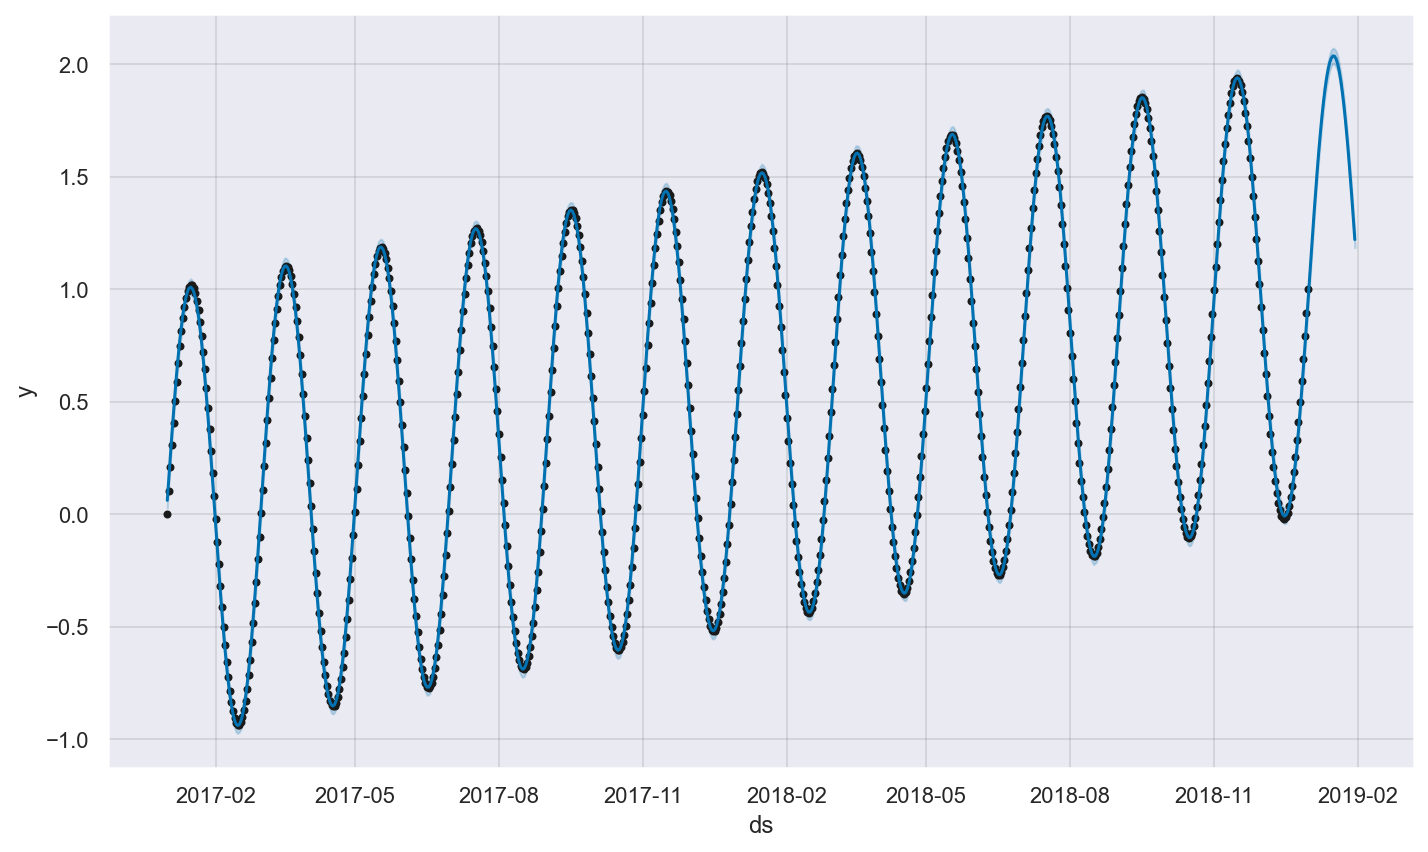

In [11]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df)
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
m.plot(forecast);

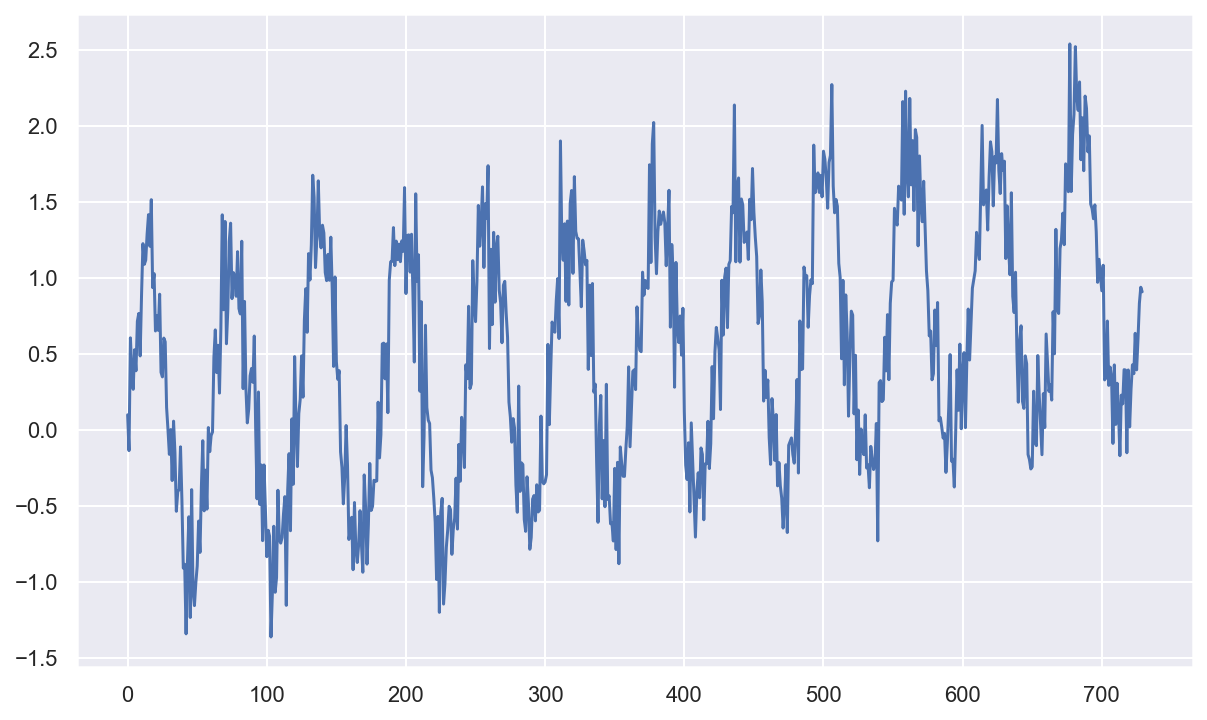

In [12]:
time = np.linspace(0,1,365*2)
result = np.sin(2*np.pi*12*time) + time + np.random.randn(365*2)/4

ds = pd.date_range('2017-01-01', periods=365*2, freq='D')
df = pd.DataFrame({'ds': ds, 'y':result})

df['y'].plot(figsize=(10,6));

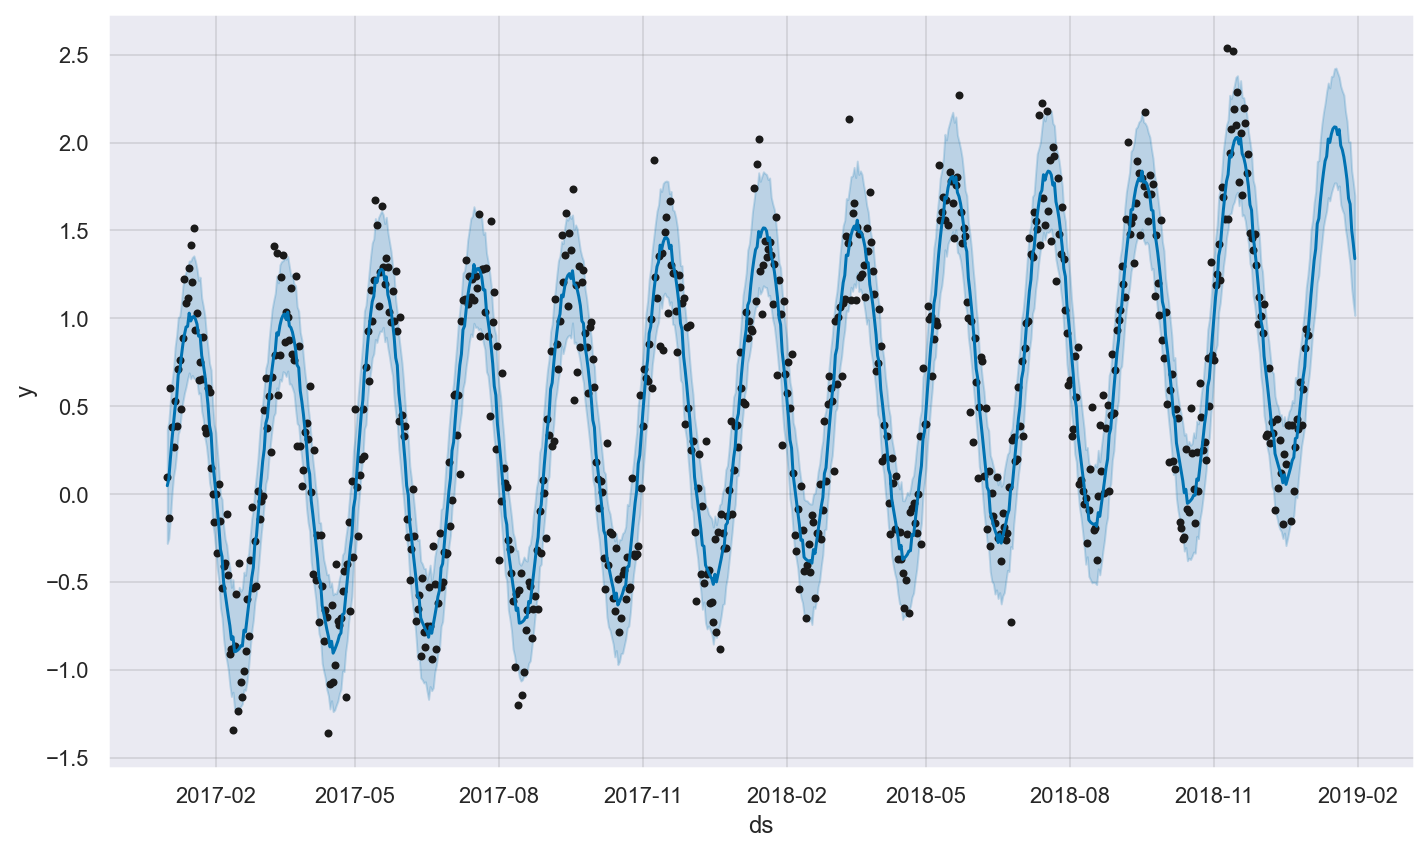

In [13]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df)
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
m.plot(forecast);

In [18]:
pinkwink_web = pd.read_excel('./pinkwink_web.xlsx', names=['ds','hit'])
pinkwink_web.head()

,ds,hit
0,2016-01-01,228
1,2016-01-02,304
2,2016-01-03,304
3,2016-01-04,659
4,2016-01-05,769


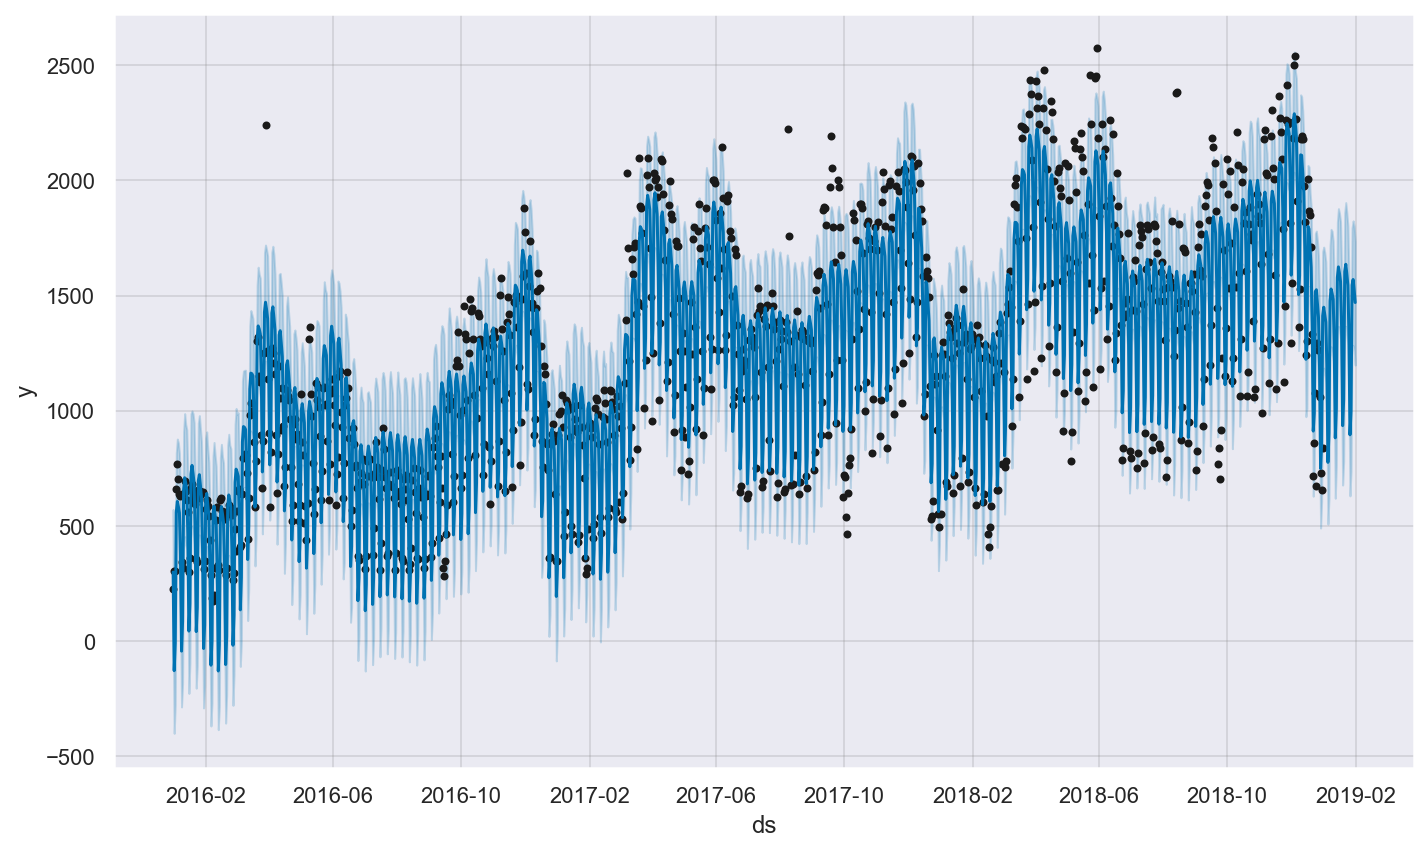

In [19]:
df = pd.DataFrame({'ds':pd.to_datetime(pinkwink_web['ds'], format='%y. %m. %d.'), 'y':pinkwink_web['hit']})
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df)
future = m.make_future_dataframe(periods=31)
forecast = m.predict(future)
m.plot(forecast);

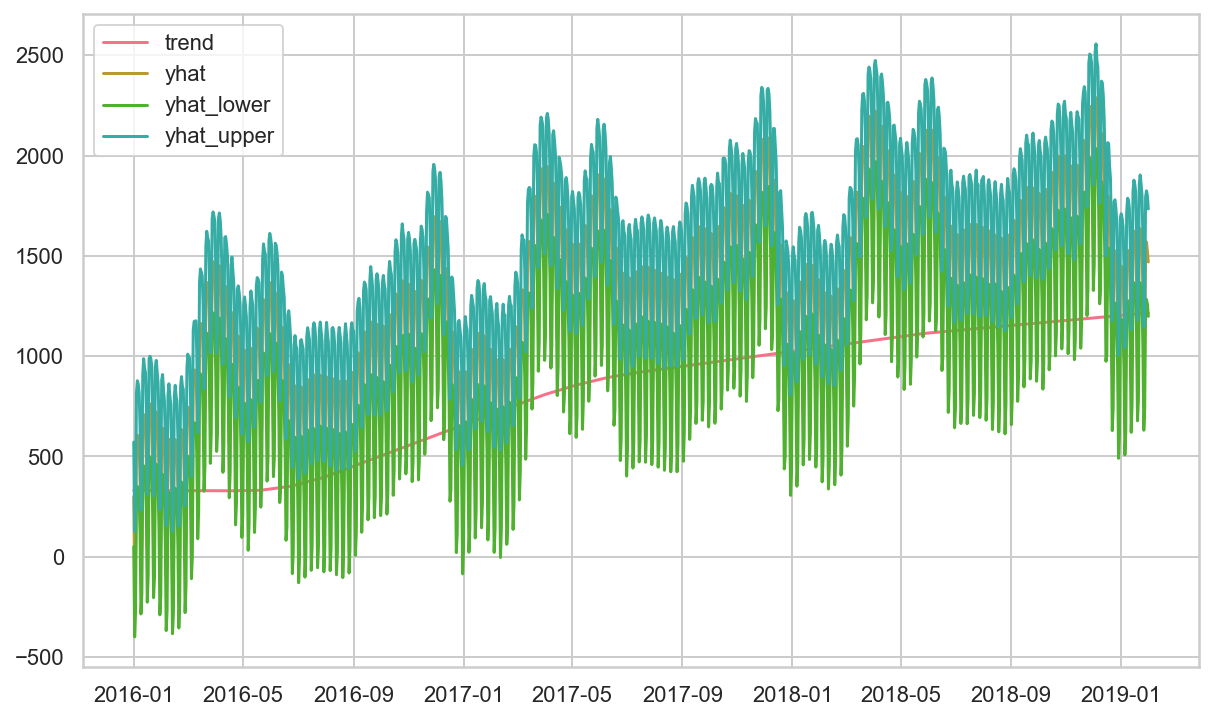

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('whitegrid')
sns.set_palette('husl')

plt.figure(figsize=(10,6))
for each in ['trend', 'yhat', 'yhat_lower', 'yhat_upper']:
    plt.plot(forecast['ds'], forecast[each], label=each)
    
plt.legend(loc='best')
plt.show()

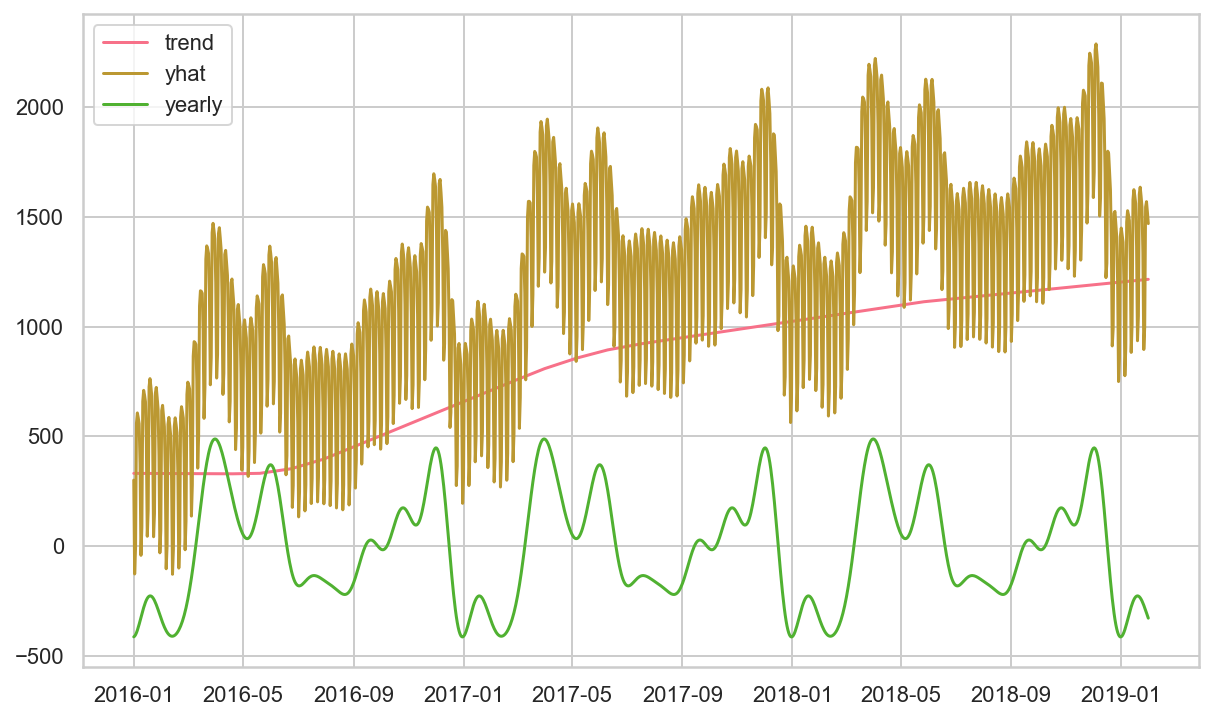

In [22]:
plt.figure(figsize=(10,6))
for each in ['trend', 'yhat', 'yearly']:
    plt.plot(forecast['ds'], forecast[each], label=each)

plt.legend(loc='best')
plt.show()    

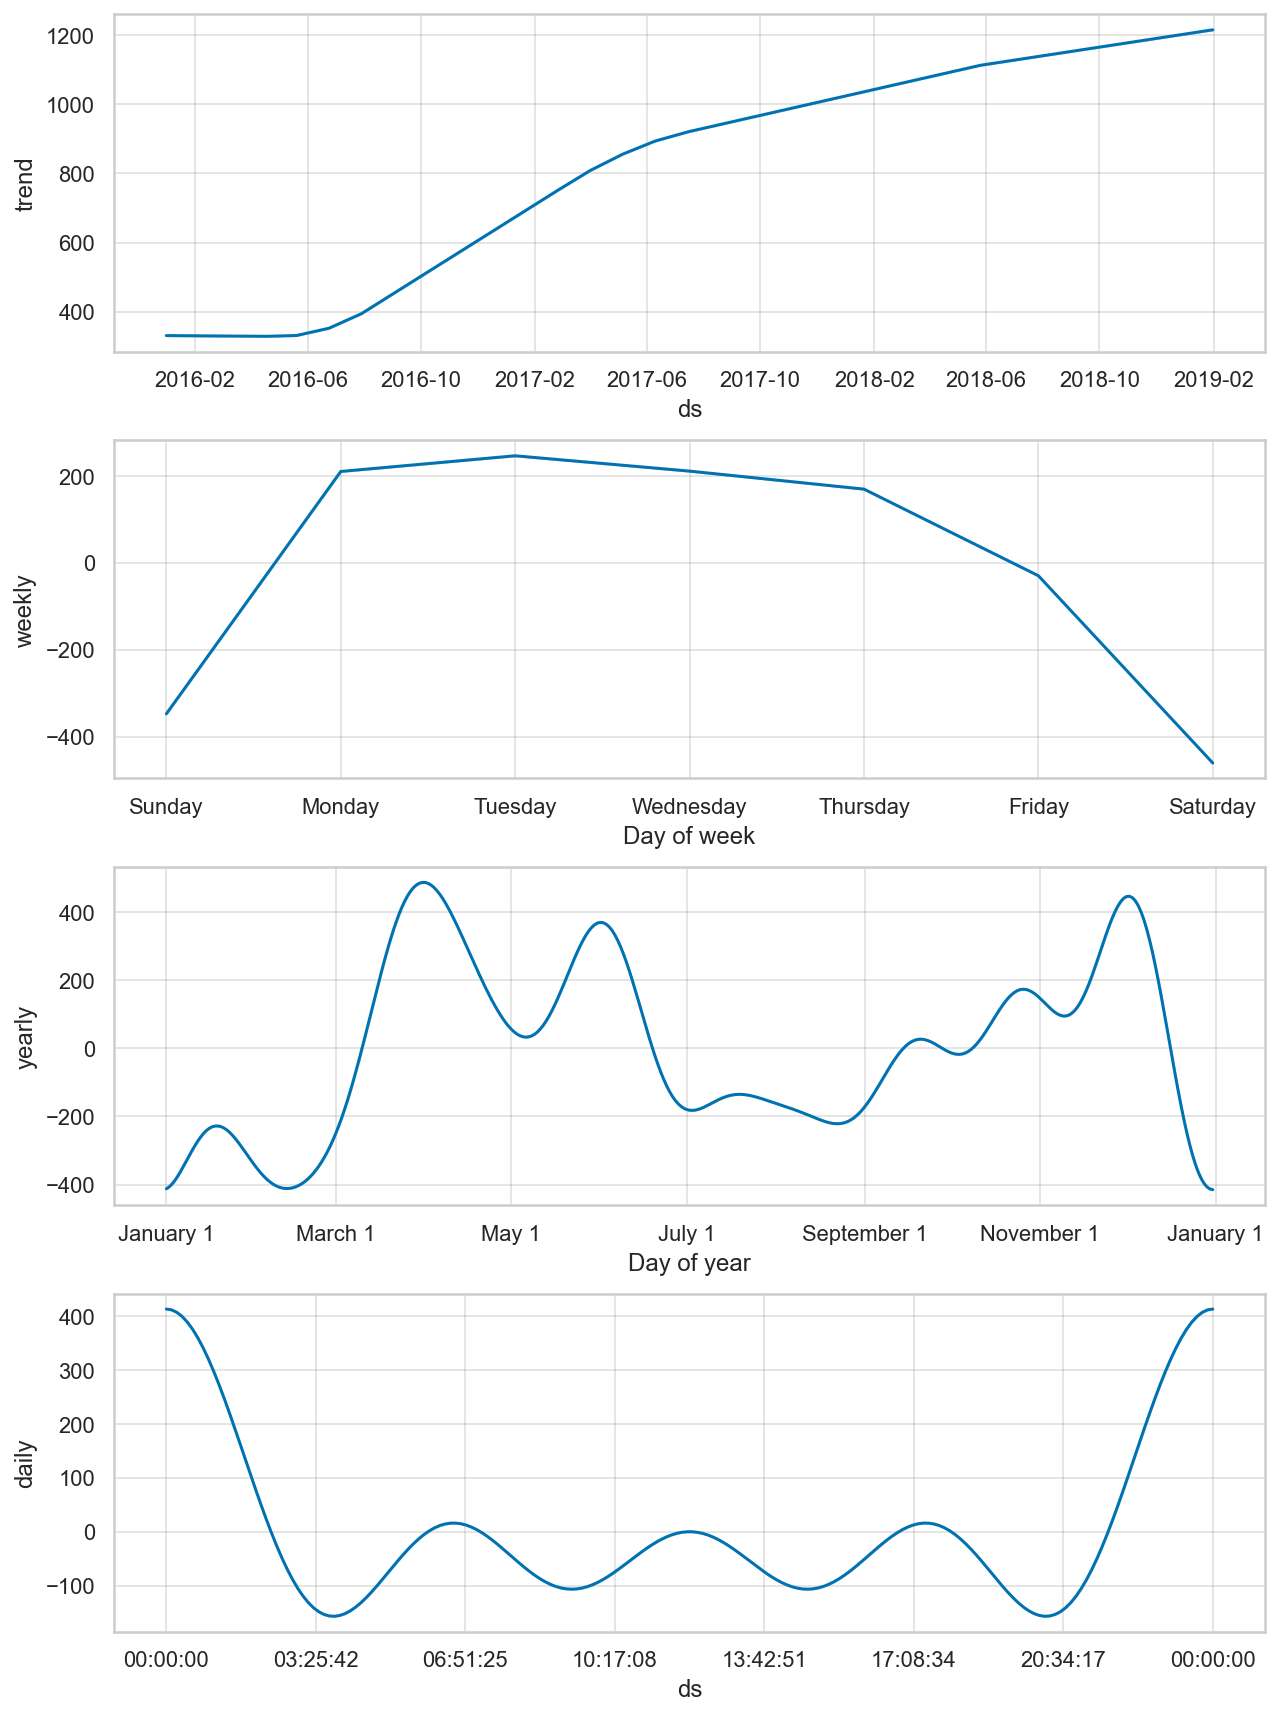

In [23]:
m.plot_components(forecast);